# Lecture 1 : Introduction to Machine Learning & Artificial Intelligence

## What is ML?

### House Price prediction

- Predicting house price based on size of the house

In [1]:
# Getting the necessary Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# Sample Data: House Size (sq. ft) Vs Price (lakhs)
house_size = np.array([1000,1500,2000,2500,3000]).reshape(-1,1);
prices = np.array([25,35,45,55,65]);


In [3]:
# Create and train the model
model = LinearRegression()
model.fit(house_size,prices)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
# Predict price for 2200 sq. ft house
new_house_size = np.array([[2200]]);
predicted_price = model.predict(new_house_size)

print(f"Predicted price for 2200 sq. ft house: ₹{predicted_price[0]:.2f} lakhs")


Predicted price for 2200 sq. ft house: ₹49.00 lakhs


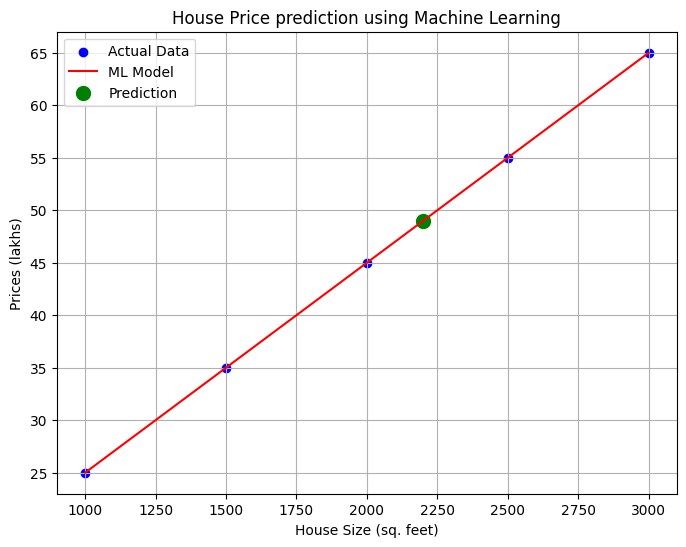

In [5]:
# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(house_size, prices, color='blue', label='Actual Data')
plt.plot(house_size, model.predict(house_size), color='red', label='ML Model')
plt.scatter(new_house_size, predicted_price, color='green', s=100, label='Prediction')
plt.xlabel('House Size (sq. feet)')
plt.ylabel('Prices (lakhs)')
plt.title('House Price prediction using Machine Learning')
plt.legend()
plt.grid(True)
plt.show()


### Learning

- ML is process of teaching machine on data to be able to predict output for similar type of data
- It is a form of mathematical relation between input and output

## Impact of DATA

### Example: Impact of data amount on Model performance

In [6]:
# Getting necessary Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification



In [7]:
# Generate synthetic dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=10, n_redundant=10, random_state=42)


In [8]:
# Test performance with different data size
data_size = [100, 500, 1000, 2000, 5000, 8000]
accuracies = []


In [9]:

for size in data_size:
    # Use only 'size' number of samples
    X_subset = X[:size]
    y_subset = y[:size]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Data size: {size}, Accuracy: {accuracy:.3f}")


Data size: 100, Accuracy: 0.800
Data size: 500, Accuracy: 0.870
Data size: 1000, Accuracy: 0.910
Data size: 1000, Accuracy: 0.910
Data size: 2000, Accuracy: 0.922
Data size: 2000, Accuracy: 0.922
Data size: 5000, Accuracy: 0.934
Data size: 5000, Accuracy: 0.934
Data size: 8000, Accuracy: 0.929
Data size: 8000, Accuracy: 0.929


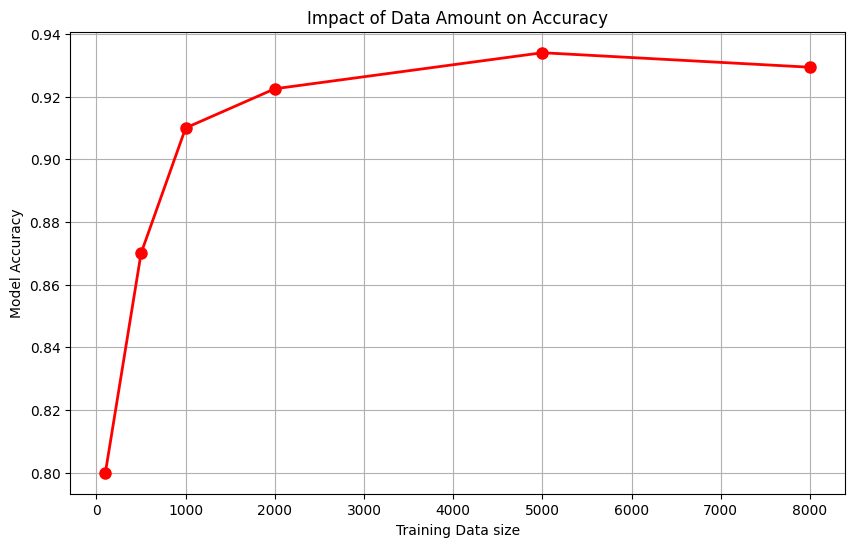

In [10]:
# Visualize the Relationship
plt.figure(figsize=(10, 6))
plt.plot(data_size, accuracies, color='red', marker='o', linewidth=2, markersize=8)
plt.xlabel('Training Data size')
plt.ylabel('Model Accuracy')
plt.title('Impact of Data Amount on Accuracy')
plt.grid(True)
plt.show()


### Learning

- Amount of data has a very large impact on the Accuracy
- The higher is amount of data, the higher is the probability of having higher accuracy
- It's a kind of one-to-one relation between ammount of data and accuracy

## Supervised Learning


### Classification

- input label (X): independent variables
- output label (Y): dependent variable (what we want to predict)
- Training data: Examples with both input label (X) and output label (Y)


#### Email Spam Detection

In [11]:
# Getting necessary library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [12]:
# Sample email data
emails = [
    "Get rich quickly! Click here now!", "Meeting at 3 PM today",
    "Free money, Limited time offer!", "Project deadline remainder",
    "congratulations! You've won $1000!", "Team lunch tomorrow",
    "Urgent! Claim your prize now!", "Please review the document",
    "Amazing discount! Buy now!", "Conference call in 10 minutes"
]

label = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Spam, 0 = Not Spam


In [13]:
# Convert text to numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(emails)


In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3, random_state=42)


In [15]:
# Train classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [16]:
# Make predictions
y_pred = classifier.predict(X_test)


In [17]:
# Evaluate
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam'], zero_division=0))


Classification Report
              precision    recall  f1-score   support

    Not Spam       0.00      0.00      0.00         2
        Spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



In [18]:
# Test with new email
new_email = ["Free offer! Click now to win money!"]
new_email_vectorizer = vectorizer.transform(new_email)
spam_prediction = classifier.predict(new_email_vectorizer)
spam_probability = classifier.predict_proba(new_email_vectorizer)


In [19]:
# Detail of prediction
print(f"\nNew email: {new_email[0]}")
print(f"Prediction: {'Spam' if spam_prediction[0]==1 else 'Not Spam'}")
print(f"Confidence: {max(spam_probability[0]):.2f}")



New email: Free offer! Click now to win money!
Prediction: Spam
Confidence: 0.73


### Regression

- predict continous numerical values

#### Student Grade Prediction

In [20]:
# Getting necessary library
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
# Sample Data: Study hours Vs Grades
study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1,1)
grades = np.array([45, 50, 55, 60, 65, 70, 75, 80, 85, 90])


In [22]:
# Add some noise to make it realistic
np.random.seed(42)
grades = grades + np.random.normal(0, 5, len(grades))


In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(study_hours, grades, test_size=0.3, random_state=42)


In [24]:
# Train regression model
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
# Make prediction
y_pred = regressor.predict(X_test)


In [26]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Square Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Square Error: 4.82
R² Score: 0.97


In [27]:
# Predict grade for 6.5 hours of study
new_hours = np.array([[6.5]])
predicted_grades = regressor.predict(new_hours)

print(f"\nPredicted grades for {new_hours[0]} hours: {predicted_grades[0]:.2f}")



Predicted grades for [6.5] hours: 77.40


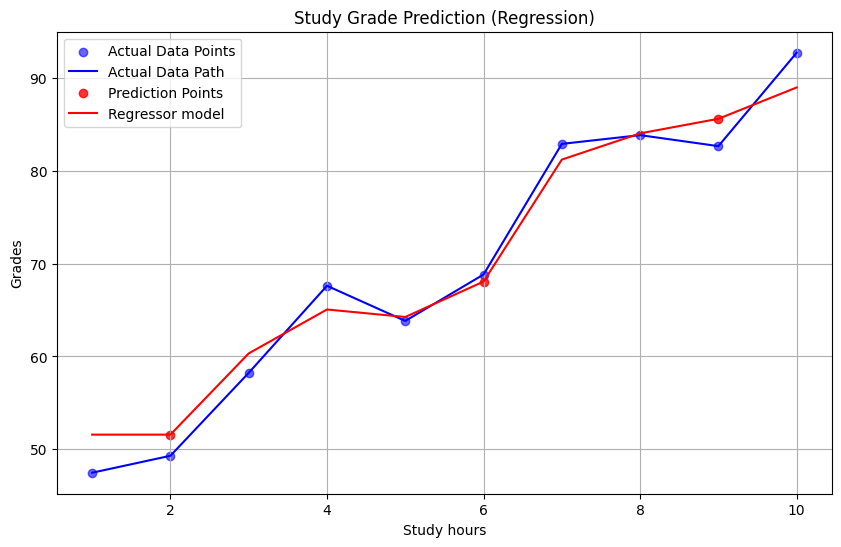

In [28]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(study_hours, grades, color='blue', alpha=0.6, label='Actual Data Points')
plt.plot(study_hours, grades, color='blue', label='Actual Data Path')
plt.scatter(X_test, y_pred, color='red', alpha=0.8, label='Prediction Points')
plt.plot(study_hours, regressor.predict(study_hours), color='red', label='Regressor model')
plt.xlabel('Study hours')
plt.ylabel('Grades')
plt.title('Study Grade Prediction (Regression)')
plt.legend()
plt.grid(True)
plt.show()


### Learning

- Supervised learning is done with dataset which include features and label
- Types:
  - Classification
  - Regression
- Good use case where you have organized datasets
  - Email spam detection
  - Object detection
  - Student Grade prediction
  - House price prediction
  - Stock price forecasting

## Unsupervised Learning

### Clustering

- Groups similar kind of data into a group
- Type of unsupervised learning
- Dataset don't need label (output)

#### Customer segmentation

In [29]:
# Getting necessary library
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [30]:
# Generate sample customer data (Age Vs Annual income)
np.random.seed(42)
n_customers = 300


In [31]:
# Create synthetic customer data
X_customers, _ = make_blobs(n_samples=n_customers, centers=4, cluster_std=1.5, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_customers)


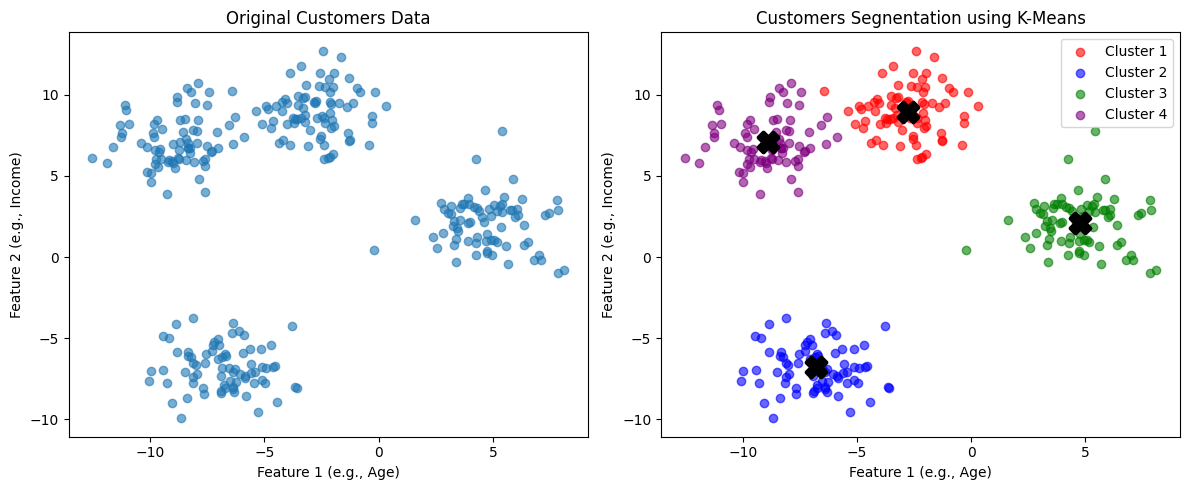

In [32]:
# Visualize clusters
plt.figure(figsize=(12,5))

# Original Data
plt.subplot(1,2,1)
plt.scatter(X_customers[:,0], X_customers[:,1], alpha=0.6)
plt.title('Original Customers Data')
plt.xlabel('Feature 1 (e.g., Age)')
plt.ylabel('Feature 2 (e.g., Income)')

# Clustered Data
plt.subplot(1,2,2)
colors = ['red', 'blue', 'green', 'purple']
for i in range(4):
    cluster_points = X_customers[cluster_labels == i]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], c=colors[i], label=f'Cluster {i+1}', alpha=0.6)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', marker='X', s=200, linewidths=3)
plt.title('Customers Segnentation using K-Means')
plt.xlabel('Feature 1 (e.g., Age)')
plt.ylabel('Feature 2 (e.g., Income)')
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
# Print clusters characteristics
for i in range(4):
    cluster_points = X_customers[cluster_labels == i]
    print(f"Cluster {i+1}: {len(cluster_points)} customers")
    print(f"    Average Feature 1: {cluster_points[:, 0].mean():.2f}")
    print(f"    Average Feature 2: {cluster_points[:, 1].mean():.2f}")


Cluster 1: 76 customers
    Average Feature 1: -2.77
    Average Feature 2: 8.96
Cluster 2: 75 customers
    Average Feature 1: -6.81
    Average Feature 2: -6.81
Cluster 3: 75 customers
    Average Feature 1: 4.76
    Average Feature 2: 2.08
Cluster 4: 74 customers
    Average Feature 1: -8.89
    Average Feature 2: 7.10


### Dimensionality Reduction

- Reduces the number of features while preserving the important information
- Used to visualize a higher dimension data into 3D
- Used for feature selection


#### Principal Component Analysis

In [34]:
# Getting necessary library
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


In [35]:
# Load iris Dataset (4D data)
iris = load_iris()
X_iris = iris.data
y_iris = iris.target


In [36]:
# Apply PCA to reduce from 4D to 2D
pca = PCA(n_components=2)
X_iris_reduced = pca.fit_transform(X_iris)


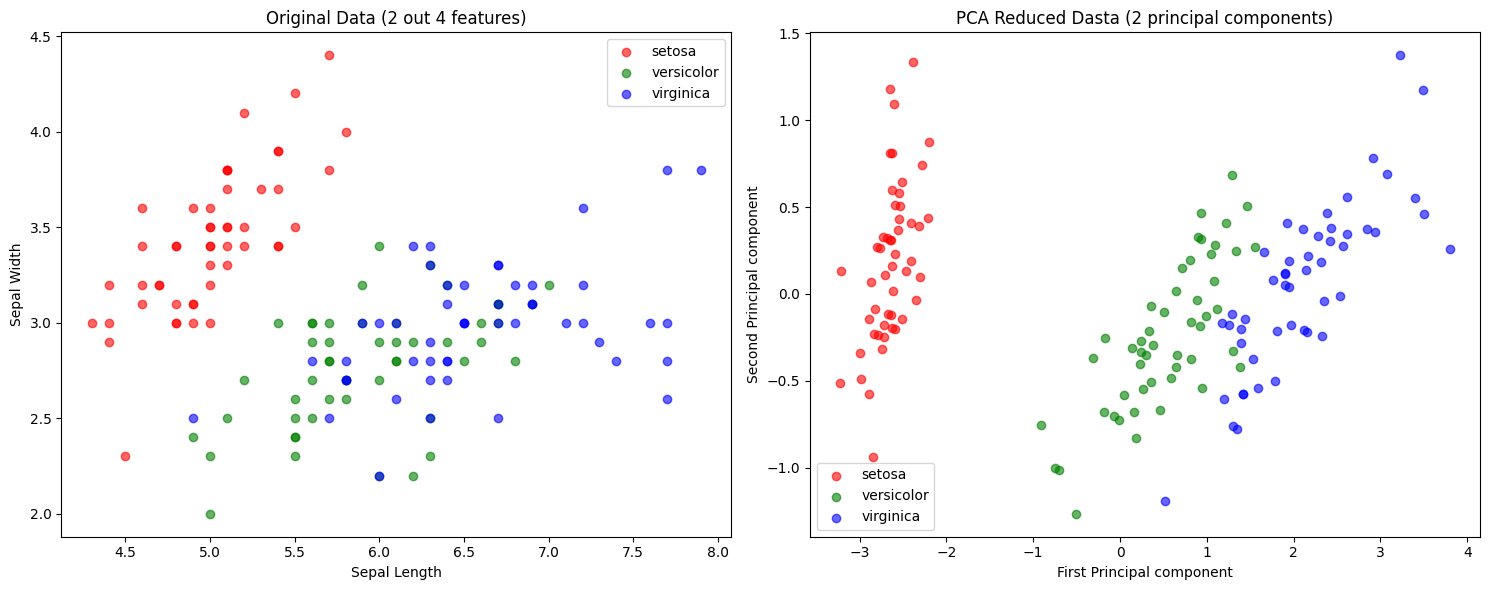

In [37]:
# Visualize original Vs reduced data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original Data (Showing only 2 features for visualization)
colors = ['red', 'green', 'blue']
for i in range(3):
    mask = (y_iris == i)
    ax1.scatter(X_iris[mask, 0], X_iris[mask, 1], c=colors[i], label=iris.target_names[i], alpha=0.6)

ax1.set_title('Original Data (2 out 4 features)')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.legend()

# Reduced Data (2 Principal components)
for i in range(3):
    mask = (y_iris == i)
    ax2.scatter(X_iris_reduced[mask, 0], X_iris_reduced[mask, 1], c=colors[i], label=iris.target_names[i], alpha=0.6)
    
ax2.set_title('PCA Reduced Dasta (2 principal components)')
ax2.set_xlabel('First Principal component')
ax2.set_ylabel('Second Principal component')
ax2.legend()

plt.tight_layout()
plt.show()


In [38]:
# Print explained variance
print(f"Expalined variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance Explained: {sum(pca.explained_variance_ratio_):.2f}")


Expalined variance ratio: [0.92461872 0.05306648]
Total variance Explained: 0.98


### Learning

- Unsupervised learning uses datasets that don't have any label
- Clustering and dimensionality reduction is part of it
- Examples:
  - Customer segmentation
  - Principal Component Analysis (PCA)